In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import sklearn
from datetime import timedelta

In [3]:
cd desktop

/Users/guochenxin/Desktop


In [6]:
driver = pd.read_csv('/Users/guochenxin/Desktop/Lyft_datathon/driver_ids.csv')
ride_ids = pd.read_csv('/Users/guochenxin/Desktop/Lyft_datathon/ride_ids.csv')
ride_timestamps = pd.read_csv('/Users/guochenxin/Desktop/Lyft_datathon/ride_timestamps.csv')

In [16]:
#pd.isnull(ride_timestamps)
ride_timestamps['timestamp'].isnull().sum()

1

In [29]:
ride_ids.head()

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3  002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4  002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   

   ride_distance  ride_duration  ride_prime_time  
0           1811            327               50  
1           3362            809                0  
2           3282            572                0  
3          65283           3338               25  
4           4115            823              100

In [25]:
pd.to_datetime(ride_timestamps['timestamp']).isna()
ride_timestamps[ride_timestamps['timestamp'].isna()]

ride_id       event timestamp
434222  72f0fa0bd86800e9da5c4dced32c8735  arrived_at       NaN

In [39]:
def fee(m, second, prim):
    cost = (2+1.15*m/1609.34+0.22*second/60+1.75)*(1+prim/100)
    if cost < 5:
        return 5
    elif cost > 400:
        return 400
    else:
        return cost
    
ride_ids['price'] = ride_ids.apply(lambda row: fee(row['ride_distance'], 
                                                   row['ride_duration'], 
                                                   row['ride_prime_time']), 
                                                   axis=1) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130133fd0>]],
      dtype=object)

<Figure size 576x432 with 0 Axes>

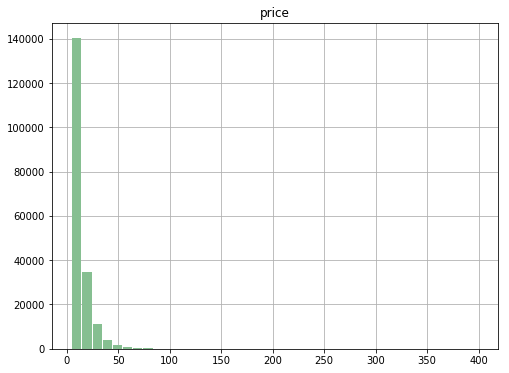

In [61]:
plt.figure(figsize=(8, 6))
#ride_ids['price'].hist(bins=5)
ride_ids.hist(column='price', bins=40, grid=True, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)

In [67]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
q= """ select driver_id, sum(price) as earning from ride_ids group by driver_id order by sum(price) desc;"""
driver_earnings = pysqldf(q)
driver_earnings

driver_id       earning
0    5ccc0e6dc9c7475caf785cdce7b8eb7a  12641.293098
1    3788dc9e91f1548816ce8b5af07ddadc  12619.132616
2    4eb382d1f7d50fae1294964263d1ce82  11087.317344
3    6b65c06851e944351dd285a1eb729499  11053.256270
4    844e9be5a30d8d9c1f8e9ddb086ff717  10854.307257
5    c07499b5a6f1090f2fb263ec6ac0660c  10153.601184
6    af452fac966efa9d089953c99045bb20   9906.303615
7    689bdf87fb2de49f98bf4946cfaa5068   9904.280778
8    55bec90600d21bd3513366d218f2b2f2   9711.433769
9    abc63585621a8cc49099bc9dde677f27   9585.953376
10   c12c2eb875879488e687111335a12805   9458.496759
11   8a64fa582ad5ac3bce95a38756b1875c   9324.375663
12   11506b81721ca68ef019764de3d8edbd   9194.965447
13   17235b165b78a09be9cd7f9abc1e833a   9183.639421
14   a4401d3bb25a651812f6781fcce5df77   9145.161060
15   3a52faf7577b389cbe9912652cbad33c   9051.772184
16   26dd952cf82f0d354e4007476748a1dc   9048.082798
17   914712bea449e20e1cd2e18c269481bf   8887.194946
18   4e9bcae1e2305fe1e6b215cb82833e97   8876.448001
19   297e507cc9f1da096e51c2223657255b   8821.620863
20   cf27028c2fe4a9fe00795d0d4dd23a18   8733.851599
21   456467f01492ee1aeb7707de5c725f1c   8722.553313
22   440abd26a1c60ce02351bf1823d2d46d   8688.108295
23   19e1cdfeaf90239d8585e6a78136a403   8669.206268
24   86a1dbd33d3ee6d68caa25966a2868a3   8598.581942
25   08a1491d6a804e0af969f08252ddbbd8   8327.675441
26   22d43c4cd79a3cbab663d9eadd1e5995   8321.010627
27   619fb670865cb3e2583cc22fde1337f1   8290.013033
28   68c4e63e9663a4bd8d4e435601a26a37   8263.214350
29   2e4d5b1e1a62e56b3a8f887641379fe4   8197.154491
..                                ...           ...
907  007f0389f9c7b03ef97098422f902e62    332.432448
908  148fb453d12992652b56d8bc2cfb1b78    328.500487
909  1c95fcac4de21d077072da1ea1705eb5    325.840494
910  14183e69946d782c92eb53b3c6eeb86f    325.598381
911  cdab4b0c1ece5d2bc1d671ef6bf21382    324.950643
912  1ed175c60fdf7380fefc804bf4dd75f3    324.445528
913  1110d496149d3d8c50276765924df831    321.853096
914  32d6b6b2ad34385519bd4492ce78eee4    319.842616
915  28e4da66781b209cd9a299365a0dcab0    312.826972
916  2f3773bd9dab0fa3e04c6f58dc0714a4    312.438039
917  3b2dca5cc3db92a05ea35056887108b6    311.139598
918  4bcc817c8aba8c5569e370b238831e77    310.956673
919  e246b5012a29db02ad24ce4b7e332b9b    307.756540
920  7767360462c03c38f487f16f57b02e02    300.684005
921  a2334fdb829cf96fbae920df0cce1587    300.126812
922  3e66ede2d283842c643b6b623d0ca168    297.829408
923  8c0d55bf42d242ac86f43c4031d6371f    289.889832
924  e4f3a9d5cf57b9b518136afd9757f76d    286.602412
925  d876df0212e45f5a630b89f5a04532fa    276.015038
926  179ef343f855d34fa0262c720cdb9a52    275.099952
927  6df6c8f8d3c2a93314245a604c02bed1    265.700704
928  07e6a2fdaadc640cca9a7bec41351065    259.449665
929  68b546b2f4102641d6774c1ce4f57457    259.395866
930  bd057e02f75c92917389d90bb215fe91    259.083477
931  da3325f424c71942ca8a3401615a0e6c    239.557369
932  706466935b9e1d04e4e116be7ce90ea9    224.786393
933  d31eded9263eab43f614eecc6a52a0f5    214.412761
934  fd831ca1d79ae5c6fc3a679a22e5b8cf    205.870550
935  7ff85c5c0e9324e28d1e0d0589c364bd     36.504523
936  7b625f643d0775f0ac4898e33235377b     25.691325

[937 rows x 2 columns]

In [89]:
q2= """select max(timestamp) from ride_timestamps"""
max_time = pysqldf(q2)
max_time
# last day is 2016-06-27 00:50:50
ride_timestamps['timestamp']= pd.to_datetime(ride_timestamps['timestamp']) 
driver['driver_onboard_date'] = pd.to_datetime(driver['driver_onboard_date'])
driver_last_time['last_time'] = pd.to_datetime(driver_last_time['last_time'])

q1 = """ select driver_id, max(request_time) as last_time from 
(select * from (select ride_id, max(timestamp) as request_time from ride_timestamps group by ride_id) tb1 
join ride_ids tb2 on tb1.ride_id = tb2.ride_id) group by driver_id"""
driver_last_time = pysqldf(q1)
driver_last_time


driver_id                   last_time
0    002be0ffdc997bd5c50703158b7c2491  2016-06-23 10:29:53.000000
1    007f0389f9c7b03ef97098422f902e62  2016-06-22 13:28:38.000000
2    011e5c5dfc5c2c92501b8b24d47509bc  2016-06-12 20:30:38.000000
3    0152a2f305e71d26cc964f8d4411add9  2016-06-26 10:36:13.000000
4    01674381af7edd264113d4e6ed55ecda  2016-06-24 13:27:38.000000
5    0213f8b59219e32142711992ca4ec01f  2016-05-07 22:21:02.000000
6    021e5cd15ef0bb3ec20a12af99e142b3  2016-06-25 20:22:52.000000
7    0258e250ca195cc6258cbdc75aecd853  2016-06-26 20:45:14.000000
8    028b5a4dcd7f4924ebfabcf2e814c014  2016-06-26 17:22:28.000000
9    02d6a6b8a6da15fc219a9570f7ebbe78  2016-06-23 15:52:47.000000
10   02e440f6c209206375833cef02e0cbae  2016-05-18 08:40:04.000000
11   036f3d94e7c65e4e3574822d31c72656  2016-06-24 17:39:59.000000
12   039c5afbca8e03e4c18d9c8ea94140ac  2016-06-12 22:00:35.000000
13   039da9c077e17af98ca8530e4d7975f1  2016-06-26 01:41:26.000000
14   03f2b5c74cb89f39e58711699e76bf39  2016-06-25 16:22:47.000000
15   03f5278eb43475aa6790f5be32463755  2016-06-24 17:42:45.000000
16   0430df9a3eb327122c57ee3a64765000  2016-04-13 21:24:28.000000
17   04c4ffa5a385eab86fa7e422263d2999  2016-05-07 18:41:43.000000
18   04d686ef2fba281e395992a28f14fdd3  2016-06-24 12:52:57.000000
19   052bba06c5fc0bdea4bc2f9cb92b37c7  2016-06-20 18:15:42.000000
20   059ed570673c2d15ca11dd6b3a25513b  2016-06-20 16:17:25.000000
21   05addf442c147875efa5cf53453ad47b  2016-06-26 11:28:06.000000
22   05bad02e08c7f849e91dc1259da8b4ec  2016-06-12 02:34:40.000000
23   0656192a402808805282e60761bda088  2016-06-27 00:05:27.000000
24   06b1ba06e5505f8218ec8686498f990a  2016-05-24 15:05:16.000000
25   06c848ab3a7fc5421e82e98850a81710  2016-06-26 23:38:02.000000
26   07dd442e3e0b9f0f9b0d69c7b47cbb06  2016-06-21 16:46:49.000000
27   07e6a2fdaadc640cca9a7bec41351065  2016-06-19 23:40:11.000000
28   081d8ba3bc9a00a481df02bd9d0a4c53  2016-06-24 15:39:53.000000
29   0822973f3e812a68a867962dbbd37f5d  2016-06-04 01:05:21.000000
..                                ...                         ...
814  f696de645de36b56677457d2d3136524  2016-06-16 21:49:06.000000
815  f758703e18f588f2370783f8b779e664  2016-04-29 18:06:01.000000
816  f7858e1e354a9fa26b3055bc12a4ee5b  2016-06-24 13:52:10.000000
817  f86eb77e1cefe28e9f0e9d3775fae261  2016-06-23 21:25:10.000000
818  f91254f1c1b3112ef3464e477d23c9e8  2016-06-05 02:33:02.000000
819  f98673773627b4b8d152e2b168b85bb2  2016-06-19 16:19:06.000000
820  f9aa6d69d74e786544027a1ab3049f44  2016-06-24 19:51:57.000000
821  fac81ea6cbd540c89c7eee17e851a233  2016-06-04 17:03:56.000000
822  faebff3d5429ff2036c125a91df765c8  2016-04-25 21:38:15.000000
823  fb83fc6555a4f700fd92630d9fcb9cea  2016-05-27 19:55:22.000000
824  fb903879c556260ae2604ae0c45cb92a  2016-06-19 22:37:14.000000
825  fba8372d56b91b1bff7b71d970b5af58  2016-05-30 22:35:35.000000
826  fbe0433e5b1a3db9dc9d6ed21efc6148  2016-06-19 01:57:47.000000
827  fc3504d2efaaaa976a33b3c856927155  2016-06-26 17:46:47.000000
828  fc83b793850ea70d9e898afd0b3ef592  2016-06-26 23:30:41.000000
829  fd2130d0d215069168dc2f79c1f5ae44  2016-06-26 04:02:55.000000
830  fd39748ba122e84e9ac492e6fb7c7a05  2016-06-26 20:41:49.000000
831  fd831ca1d79ae5c6fc3a679a22e5b8cf  2016-05-23 08:56:21.000000
832  fda96e6cd3395dfae3e59cd4ac95f7d7  2016-06-26 18:33:35.000000
833  fdbee494c73577d5b1266d1fec5c6c9a  2016-06-11 12:16:42.000000
834  fde60697758e68d617f471e49f65db75  2016-04-30 02:10:04.000000
835  fdff1a7205bc3b9ab1dc5dc223782fc5  2016-06-25 10:39:17.000000
836  fe35f74209d1056dd315ddb17681203d  2016-06-25 11:50:25.000000
837  fe469488a23d4bdda47b83a659dcc103  2016-06-26 00:46:31.000000
838  fed19d671569afe8a2f9fa0953dd25ca  2016-04-24 09:20:15.000000
839  ff419a3476e21e269e340b5f1f05414e  2016-06-26 18:12:34.000000
840  ff714a67ba8c6a108261cd81e3b77f3a  2016-06-17 09:40:18.000000
841  fff482c704d36a1afe8b8978d5486283  2016-05-12 17:00:18.000000
842  fffecccc49436c5389075b13209f0dfa  2016-06-26 21:11:47.000000
84

In [78]:
q2= """select max(timestamp) from ride_timestamps"""
max_time = pysqldf(q2)
max_time

max(timestamp)
0  2016-06-27 00:50:50

In [119]:

q2= """
    select 
        driver.driver_id, 
        driver.driver_onboard_date, 
        driver_last_time.last_time, 
        driver_earnings.earning
    from 
        driver 
    join 
        driver_last_time
    on 
        driver.driver_id = driver_last_time.driver_id 
    join 
        driver_earnings 
    on 
        driver.driver_id = driver_earnings.driver_id
        
    """
# 837-824 there are 15 people whose last_time is 2016-06-27
total = pysqldf(q2)
total['driver_onboard_date'] = pd.to_datetime(total['driver_onboard_date'])
total['last_time'] = pd.to_datetime(total['last_time'])
total['duration'] = total['last_time'] - total['driver_onboard_date']
total

driver_id driver_onboard_date           last_time  \
0    002be0ffdc997bd5c50703158b7c2491          2016-03-29 2016-06-23 10:29:53   
1    007f0389f9c7b03ef97098422f902e62          2016-03-29 2016-06-22 13:28:38   
2    011e5c5dfc5c2c92501b8b24d47509bc          2016-04-05 2016-06-12 20:30:38   
3    0152a2f305e71d26cc964f8d4411add9          2016-04-23 2016-06-26 10:36:13   
4    01674381af7edd264113d4e6ed55ecda          2016-04-29 2016-06-24 13:27:38   
5    0213f8b59219e32142711992ca4ec01f          2016-04-07 2016-05-07 22:21:02   
6    021e5cd15ef0bb3ec20a12af99e142b3          2016-05-07 2016-06-25 20:22:52   
7    0258e250ca195cc6258cbdc75aecd853          2016-04-26 2016-06-26 20:45:14   
8    028b5a4dcd7f4924ebfabcf2e814c014          2016-05-06 2016-06-26 17:22:28   
9    02d6a6b8a6da15fc219a9570f7ebbe78          2016-05-03 2016-06-23 15:52:47   
10   02e440f6c209206375833cef02e0cbae          2016-03-31 2016-05-18 08:40:04   
11   036f3d94e7c65e4e3574822d31c72656          2016-04-09 2016-06-24 17:39:59   
12   039c5afbca8e03e4c18d9c8ea94140ac          2016-04-12 2016-06-12 22:00:35   
13   039da9c077e17af98ca8530e4d7975f1          2016-05-04 2016-06-26 01:41:26   
14   03f2b5c74cb89f39e58711699e76bf39          2016-04-10 2016-06-25 16:22:47   
15   03f5278eb43475aa6790f5be32463755          2016-04-12 2016-06-24 17:42:45   
16   0430df9a3eb327122c57ee3a64765000          2016-04-05 2016-04-13 21:24:28   
17   04c4ffa5a385eab86fa7e422263d2999          2016-04-07 2016-05-07 18:41:43   
18   04d686ef2fba281e395992a28f14fdd3          2016-05-14 2016-06-24 12:52:57   
19   052bba06c5fc0bdea4bc2f9cb92b37c7          2016-04-15 2016-06-20 18:15:42   
20   059ed570673c2d15ca11dd6b3a25513b          2016-05-12 2016-06-20 16:17:25   
21   05addf442c147875efa5cf53453ad47b          2016-04-08 2016-06-26 11:28:06   
22   05bad02e08c7f849e91dc1259da8b4ec          2016-05-12 2016-06-12 02:34:40   
23   0656192a402808805282e60761bda088          2016-04-30 2016-06-27 00:05:27   
24   06b1ba06e5505f8218ec8686498f990a          2016-05-11 2016-05-24 15:05:16   
25   06c848ab3a7fc5421e82e98850a81710          2016-04-20 2016-06-26 23:38:02   
26   07dd442e3e0b9f0f9b0d69c7b47cbb06          2016-04-08 2016-06-21 16:46:49   
27   07e6a2fdaadc640cca9a7bec41351065          2016-05-14 2016-06-19 23:40:11   
28   081d8ba3bc9a00a481df02bd9d0a4c53          2016-04-04 2016-06-24 15:39:53   
29   0822973f3e812a68a867962dbbd37f5d          2016-05-08 2016-06-04 01:05:21   
..                                ...                 ...                 ...   
807  f696de645de36b56677457d2d3136524          2016-04-20 2016-06-16 21:49:06   
808  f758703e18f588f2370783f8b779e664          2016-03-29 2016-04-29 18:06:01   
809  f7858e1e354a9fa26b3055bc12a4ee5b          2016-04-19 2016-06-24 13:52:10   
810  f86eb77e1cefe28e9f0e9d3775fae261          2016-03-28 2016-06-23 21:25:10   
811  f91254f1c1b3112ef3464e477d23c9e8          2016-05-01 2016-06-05 02:33:02   
812  f98673773627b4b8d152e2b168b85bb2          2016-05-15 2016-06-19 16:19:06   
813  f9aa6d69d74e786544027a1ab3049f44          2016-04-27 2016-06-24 19:51:57   
814  fac81ea6cbd540c89c7eee17e851a233          2016-04-30 2016-06-04 17:03:56   
815  faebff3d5429ff2036c125a91df765c8          2016-03-28 2016-04-25 21:38:15   
816  fb83fc6555a4f700fd92630d9fcb9cea          2016-04-28 2016-05-27 19:55:22   
817  fb903879c556260ae2604ae0c45cb92a          2016-05-02 2016-06-19 22:37:14   
818  fba8372d56b91b1bff7b71d970b5af58          2016-04-01 2016-05-30 22:35:35   
819  fbe0433e5b1a3db9dc9d6ed21efc6148          2016-05-08 2016-06-19 01:57:47   
820  fc3504d2efaaaa976a33b3c856927155          2016-04-24 2016-06-26 17:46:47   
821  fc83b793850ea70d9e898afd0b3ef592          2016-04-15 2016-06-26 23:30:41   
822  fd2130d0d215069168dc2f79c1f5ae44          2016-04-08 2016-06-26 04:02:55   
823  fd39748ba122e84e9ac492e6fb7c7a05          2016-04-17 2016-06-26 20:41:49   
824  fd831ca1d79ae5c6fc3a679a22e5b8cf          2016-05-07 2

In [120]:
# average duration
total['duration'].mean()

Timedelta('55 days 17:37:32.475507')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135a64e48>]],
      dtype=object)

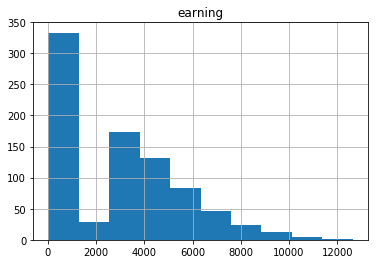

In [129]:
total.hist(column= 'earning')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e39cb00>]],
      dtype=object)

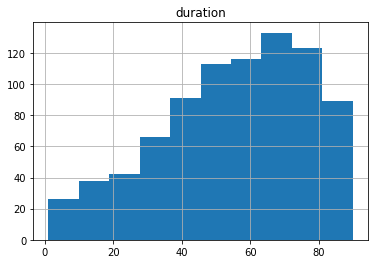

In [131]:
total['duration'] = total['duration'].dt.days.astype('int16')
total.hist(column= 'duration')

In [101]:
#driver_last_time['last_time'] = pd.to_datetime(driver_last_time['last_time'])


In [132]:
q3 = """select 
            tb1.*, 
            tb2.sum_prime 
        from 
            total tb1 
        join 
            (select 
                driver_id, 
                sum(ride_prime_time) as sum_prime 
            from 
                ride_ids 
            group by 
                driver_id
            ) tb2 
        on 
            tb1.driver_id = tb2.driver_id"""
model_df = pysqldf(q3)
model_df

driver_id         driver_onboard_date  \
0    002be0ffdc997bd5c50703158b7c2491  2016-03-29 00:00:00.000000   
1    007f0389f9c7b03ef97098422f902e62  2016-03-29 00:00:00.000000   
2    011e5c5dfc5c2c92501b8b24d47509bc  2016-04-05 00:00:00.000000   
3    0152a2f305e71d26cc964f8d4411add9  2016-04-23 00:00:00.000000   
4    01674381af7edd264113d4e6ed55ecda  2016-04-29 00:00:00.000000   
5    0213f8b59219e32142711992ca4ec01f  2016-04-07 00:00:00.000000   
6    021e5cd15ef0bb3ec20a12af99e142b3  2016-05-07 00:00:00.000000   
7    0258e250ca195cc6258cbdc75aecd853  2016-04-26 00:00:00.000000   
8    028b5a4dcd7f4924ebfabcf2e814c014  2016-05-06 00:00:00.000000   
9    02d6a6b8a6da15fc219a9570f7ebbe78  2016-05-03 00:00:00.000000   
10   02e440f6c209206375833cef02e0cbae  2016-03-31 00:00:00.000000   
11   036f3d94e7c65e4e3574822d31c72656  2016-04-09 00:00:00.000000   
12   039c5afbca8e03e4c18d9c8ea94140ac  2016-04-12 00:00:00.000000   
13   039da9c077e17af98ca8530e4d7975f1  2016-05-04 00:00:00.000000   
14   03f2b5c74cb89f39e58711699e76bf39  2016-04-10 00:00:00.000000   
15   03f5278eb43475aa6790f5be32463755  2016-04-12 00:00:00.000000   
16   0430df9a3eb327122c57ee3a64765000  2016-04-05 00:00:00.000000   
17   04c4ffa5a385eab86fa7e422263d2999  2016-04-07 00:00:00.000000   
18   04d686ef2fba281e395992a28f14fdd3  2016-05-14 00:00:00.000000   
19   052bba06c5fc0bdea4bc2f9cb92b37c7  2016-04-15 00:00:00.000000   
20   059ed570673c2d15ca11dd6b3a25513b  2016-05-12 00:00:00.000000   
21   05addf442c147875efa5cf53453ad47b  2016-04-08 00:00:00.000000   
22   05bad02e08c7f849e91dc1259da8b4ec  2016-05-12 00:00:00.000000   
23   0656192a402808805282e60761bda088  2016-04-30 00:00:00.000000   
24   06b1ba06e5505f8218ec8686498f990a  2016-05-11 00:00:00.000000   
25   06c848ab3a7fc5421e82e98850a81710  2016-04-20 00:00:00.000000   
26   07dd442e3e0b9f0f9b0d69c7b47cbb06  2016-04-08 00:00:00.000000   
27   07e6a2fdaadc640cca9a7bec41351065  2016-05-14 00:00:00.000000   
28   081d8ba3bc9a00a481df02bd9d0a4c53  2016-04-04 00:00:00.000000   
29   0822973f3e812a68a867962dbbd37f5d  2016-05-08 00:00:00.000000   
..                                ...                         ...   
807  f696de645de36b56677457d2d3136524  2016-04-20 00:00:00.000000   
808  f758703e18f588f2370783f8b779e664  2016-03-29 00:00:00.000000   
809  f7858e1e354a9fa26b3055bc12a4ee5b  2016-04-19 00:00:00.000000   
810  f86eb77e1cefe28e9f0e9d3775fae261  2016-03-28 00:00:00.000000   
811  f91254f1c1b3112ef3464e477d23c9e8  2016-05-01 00:00:00.000000   
812  f98673773627b4b8d152e2b168b85bb2  2016-05-15 00:00:00.000000   
813  f9aa6d69d74e786544027a1ab3049f44  2016-04-27 00:00:00.000000   
814  fac81ea6cbd540c89c7eee17e851a233  2016-04-30 00:00:00.000000   
815  faebff3d5429ff2036c125a91df765c8  2016-03-28 00:00:00.000000   
816  fb83fc6555a4f700fd92630d9fcb9cea  2016-04-28 00:00:00.000000   
817  fb903879c556260ae2604ae0c45cb92a  2016-05-02 00:00:00.000000   
818  fba8372d56b91b1bff7b71d970b5af58  2016-04-01 00:00:00.000000   
819  fbe0433e5b1a3db9dc9d6ed21efc6148  2016-05-08 00:00:00.000000   
820  fc3504d2efaaaa976a33b3c856927155  2016-04-24 00:00:00.000000   
821  fc83b793850ea70d9e898afd0b3ef592  2016-04-15 00:00:00.000000   
822  fd2130d0d215069168dc2f79c1f5ae44  2016-04-08 00:00:00.000000   
823  fd39748ba122e84e9ac492e6fb7c7a05  2016-04-17 00:00:00.000000   
824  fd831ca1d79ae5c6fc3a679a22e5b8cf  2016-05-07 00:00:00.000000   
825  fda96e6cd3395dfae3e59cd4ac95f7d7  2016-04-24 00:00:00.000000   
826  fdbee494c73577d5b1266d1fec5c6c9a  2016-05-15 00:00:00.000000   
827  fde60697758e68d617f471e49f65db75  2016-04-25 00:00:00.000000   
828  fdff1a7205bc3b9ab1dc5dc223782fc5  2016-03-31 00:00:00.000000   
829  fe35f74209d1056dd315ddb17681203d  2016-04-05 00:00:00.000000   
830  fe469488a23d4bdda47b83a659dcc103  2016-04-16 00:00:00.000000   
831  fed19d671569afe8a2f9fa0953dd25ca  2016-03-29 00:00:00.000000   
832  ff419a3476e21e269e340b5f1f05414e  2016-04-26 00:00:00.000000   
833  ff714a67ba8c6a108261c

In [140]:
model_df_notime = model_df.drop(['driver_onboard_date','last_time', 'driver_id'], axis=1)
model_df_notime.head()

earning  duration  sum_prime
0  3654.988571        86       5375
1   332.432448        85        625
2   494.240890        68        675
3  2646.746561        64       2050
4  5463.347539        56       4700

In [182]:
X = model_df_notime.iloc[:, 1:]
y = model_df_notime.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)
# before kmeans, it need normalization and standardlization
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print(scaler.mean_)
print(scaler.scale_)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

[  55.0044843  3848.39312407]
[  21.8807403  3549.93371327]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


0         1
0  0.959543  0.232851
1  0.959543 -0.351667
2  1.050948  0.282148
3 -1.234167 -1.027736
4 -2.468129 -1.041820

In [183]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)

In [184]:
kmeans.labels_

array([2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 0, 0, 2, 2, 3, 0, 0, 2, 1,
       3, 3, 0, 1, 2, 1, 0, 1, 2, 2, 3, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1,
       0, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 1, 0, 3,
       3, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 3, 0, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 0, 2, 2, 0, 2, 1, 2, 3, 2, 1,
       0, 2, 2, 3, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 3, 3, 3, 0, 2, 2, 1, 2,
       1, 3, 2, 2, 0, 0, 0, 2, 0, 3, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 3, 2,
       1, 3, 1, 2, 0, 3, 1, 0, 1, 2, 2, 3, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2,
       3, 3, 2, 2, 1, 3, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 3,
       1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 3, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 2, 0, 0, 3, 0, 3,
       1, 0, 0, 2, 2, 2, 0, 2, 3, 2, 0, 2, 1, 0, 3, 0, 1, 3, 0, 1, 1, 2,
       0, 2, 3, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1,

In [185]:
kmeans.cluster_centers_

array([[-1.21084935, -0.91146435],
       [-0.14152124,  0.49772843],
       [ 0.8389506 , -0.2268566 ],
       [ 0.71286095,  1.89137545]])

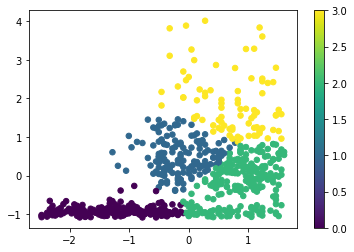

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_scaled.iloc[:, 0],X_scaled.iloc[:, 1],
                     c=kmeans.labels_,s=30)
plt.colorbar(scatter)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = model_df_notime.iloc[:, 1:]
y = model_df_notime.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)
print(test_set_rmse)
print(test_set_r2)
print(lin_reg_mod.coef_)

877.3987555699562
0.8769188089477125
[16.87096571  0.59334176]


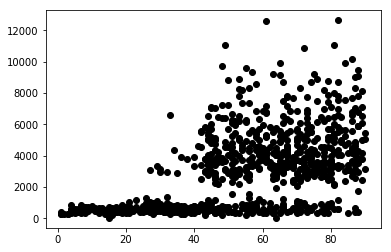

In [166]:
plt.scatter(model_df_notime['duration'], model_df_notime['earning'],  color='black')


In [203]:
q4 = """select r.*, t.time from ride_ids r join (select ride_id, min(timestamp) as time from ride_timestamps group by ride_id) t 
on r.ride_id = t.ride_id"""
table = pysqldf(q4)
table

driver_id                           ride_id  \
0       002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1       002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2       002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3       002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4       002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   
5       002be0ffdc997bd5c50703158b7c2491  03d6b9d80b8a96135cb9b25178e9e203   
6       002be0ffdc997bd5c50703158b7c2491  04053c0ed21761e07f0b869cab5b7dd0   
7       002be0ffdc997bd5c50703158b7c2491  0534d432e0186625f623aaee57af98be   
8       002be0ffdc997bd5c50703158b7c2491  053a1621c0affcd2b9c517af5c2bc843   
9       002be0ffdc997bd5c50703158b7c2491  066e92c52f59486de56cd7b8716a4ca6   
10      002be0ffdc997bd5c50703158b7c2491  07d400d669489e627818e46dc097858a   
11      002be0ffdc997bd5c50703158b7c2491  08563e36dfef562d2e41d1852b38fec5   
12      002be0ffdc997bd5c50703158b7c2491  09ee3ac7bf061004b989e358b9f11ea9   
13      002be0ffdc997bd5c50703158b7c2491  0c640d3b03deb73141b3c6b68e4c27e3   
14      002be0ffdc997bd5c50703158b7c2491  0cb00b0a036b31a0431cc3136a5caf6e   
15      002be0ffdc997bd5c50703158b7c2491  0dfbe7e38482e24247f6ebd53d5f6c33   
16      002be0ffdc997bd5c50703158b7c2491  0f3df9d8799789e3dd020c3ac4241d3d   
17      002be0ffdc997bd5c50703158b7c2491  108ab65b6880fa96818a58bb3a09b54e   
18      002be0ffdc997bd5c50703158b7c2491  10d9fed7757ba816e4aa26e147b68086   
19      002be0ffdc997bd5c50703158b7c2491  11de22057e906f424ca556072dd58145   
20      002be0ffdc997bd5c50703158b7c2491  12af6a4871900b087917d90c1d3f9920   
21      002be0ffdc997bd5c50703158b7c2491  131cff806e3ae5d8b4303f42301cb400   
22      002be0ffdc997bd5c50703158b7c2491  1364cd661f12ef24a68a50d5b519baf6   
23      002be0ffdc997bd5c50703158b7c2491  13f9268a26623802befeed6d4a29262c   
24      002be0ffdc997bd5c50703158b7c2491  14c62810c8119e478739ec37883d35ca   
25      002be0ffdc997bd5c50703158b7c2491  15f47ae15319cc6402cdd28d87bd0cdf   
26      002be0ffdc997bd5c50703158b7c2491  178a0bd572ca2ab09eb035591c54474d   
27      002be0ffdc997bd5c50703158b7c2491  178efb0cce67d03a87bda8be3aaff678   
28      002be0ffdc997bd5c50703158b7c2491  17bf597da0d4f2b6776937bfcbe31f2d   
29      002be0ffdc997bd5c50703158b7c2491  185d202547b721490daca6c10190083b   
...                                  ...                               ...   
184789  ffff51a71f2f185ec5e97d59dbcd7a78  e8ddbb0f5a02d033d7a364eb0c83b465   
184790  ffff51a71f2f185ec5e97d59dbcd7a78  e997fbd2b68cd50d4efc3e6e92642e7e   
184791  ffff51a71f2f185ec5e97d59dbcd7a78  e9b5f7b3d3f7414c69b0f3e1999bd857   
184792  ffff51a71f2f185ec5e97d59dbcd7a78  e9cbb9adf1fb0cf46463222782f865c6   
184793  ffff51a71f2f185ec5e97d59dbcd7a78  eadcac475e22c22a3990e330f40f08ba   
184794  ffff51a71f2f185ec5e97d59dbcd7a78  eba45349cbbe7310cbefb074f4920c8f   
184795  ffff51a71f2f185ec5e97d59dbcd7a78  ed242ef611310942a3120c5cf3b07c16   
184796  ffff51a71f2f185ec5e97d59dbcd7a78  eda93e959b05ce4a86eac776e324b9f3   
184797  ffff51a71f2f185ec5e97d59dbcd7a78  edb40b27e5e520fea5cd261aad492142   
184798  ffff51a71f2f185ec5e97d59dbcd7a78  ee5c7b23777eada9ecdc1d5314f636a6   
184799  ffff51a71f2f185ec5e97d59dbcd7a78  efa446fe3239929ced9b62886f479501   
184800  ffff51a71f2f185ec5e97d59dbcd7a78  f02620fb8505a346f1d8cf94dbf64787   
184801  ffff51a71f2f185ec5e97d59dbcd7a78  f1f393189cebe042d3c442165803e8d4   
184802  ffff51a71f2f185ec5e97d59dbcd7a78  f3a65bba1e1d4d46cd40f9181508aac9   
184803  ffff51a71f2f185ec5e97d59dbcd7a78  f3b5dc767641b99b8999a771db5f7b35   
184804  ffff51a71f2f185ec5e97d59dbcd7a78  f44121a0ced4fd187c7cb50919794d6a   
184805  ffff51a71f2f185ec5e97d59dbcd7a78  f44a36e2bf1dbb401e0b81ad7ebde105   
184806  ffff51a71f2f185ec5e97d59dbcd7a78  f5af9cb836b8ce427842f024aaeffd6f   
184807  ffff51a71f2f185ec5e97d59dbcd7a78  f69caf97c0e139edc297594f84f225e6   
184808  ffff51a71f2f185ec5e97d59dbcd7a78  f73155474c1

In [232]:
# total count
ride_count = pd.DataFrame(ride_ids.groupby(['driver_id'])['ride_id'].count())
ride_count.head()

ride_id
driver_id                                
002be0ffdc997bd5c50703158b7c2491      277
007f0389f9c7b03ef97098422f902e62       31
011e5c5dfc5c2c92501b8b24d47509bc       34
0152a2f305e71d26cc964f8d4411add9      191
01674381af7edd264113d4e6ed55ecda      375

In [233]:
def hr_func(ts):
    return ts.hour
table['time'] = pd.to_datetime(table['time'])
table['hour'] = table['time'].apply(hr_func)



In [234]:
table.head()
table['career_work'] = table.apply(lambda row: 9 < row['hour'] < 17, axis=1)
table['night'] = table.apply(lambda row: row['hour'] > 19 or row['hour'] < 6, axis=1)
table['peak'] = table.apply(lambda row: 8< row['hour']< 10 or 16 < row['hour'] < 18, axis=1)

In [235]:
ride_day_count = pd.DataFrame(table.groupby(['driver_id'])['career_work'].sum())
ride_night_count = pd.DataFrame(table.groupby(['driver_id'])['night'].sum())
ride_peak_count = pd.DataFrame(table.groupby(['driver_id'])['peak'].sum())

In [236]:
ride_day_count.head()
ride_count['day_count'] = ride_day_count['career_work']
ride_count['night_count'] = ride_night_count['night']
ride_count['peak'] = ride_peak_count['peak']

In [237]:
ride_count.columns=['total_count', 'day_count', 'night_count', 'peak_count']

In [238]:
ride_count.head()

total_count  day_count  night_count  \
driver_id                                                               
002be0ffdc997bd5c50703158b7c2491          277       59.0        132.0   
007f0389f9c7b03ef97098422f902e62           31        9.0         17.0   
011e5c5dfc5c2c92501b8b24d47509bc           34        8.0         11.0   
0152a2f305e71d26cc964f8d4411add9          191       32.0        105.0   
01674381af7edd264113d4e6ed55ecda          375      191.0          0.0   

                                  peak_count  
driver_id                                     
002be0ffdc997bd5c50703158b7c2491        19.0  
007f0389f9c7b03ef97098422f902e62         3.0  
011e5c5dfc5c2c92501b8b24d47509bc         2.0  
0152a2f305e71d26cc964f8d4411add9         8.0  
01674381af7edd264113d4e6ed55ecda        53.0

In [246]:
q5 = """select m.*, r.total_count, r.day_count, r.night_count, r.peak_count 
from model_df m join ride_count r on m.driver_id = r.driver_id"""
new = pysqldf(q5)
new

driver_id         driver_onboard_date  \
0    002be0ffdc997bd5c50703158b7c2491  2016-03-29 00:00:00.000000   
1    007f0389f9c7b03ef97098422f902e62  2016-03-29 00:00:00.000000   
2    011e5c5dfc5c2c92501b8b24d47509bc  2016-04-05 00:00:00.000000   
3    0152a2f305e71d26cc964f8d4411add9  2016-04-23 00:00:00.000000   
4    01674381af7edd264113d4e6ed55ecda  2016-04-29 00:00:00.000000   
5    0213f8b59219e32142711992ca4ec01f  2016-04-07 00:00:00.000000   
6    021e5cd15ef0bb3ec20a12af99e142b3  2016-05-07 00:00:00.000000   
7    0258e250ca195cc6258cbdc75aecd853  2016-04-26 00:00:00.000000   
8    028b5a4dcd7f4924ebfabcf2e814c014  2016-05-06 00:00:00.000000   
9    02d6a6b8a6da15fc219a9570f7ebbe78  2016-05-03 00:00:00.000000   
10   02e440f6c209206375833cef02e0cbae  2016-03-31 00:00:00.000000   
11   036f3d94e7c65e4e3574822d31c72656  2016-04-09 00:00:00.000000   
12   039c5afbca8e03e4c18d9c8ea94140ac  2016-04-12 00:00:00.000000   
13   039da9c077e17af98ca8530e4d7975f1  2016-05-04 00:00:00.000000   
14   03f2b5c74cb89f39e58711699e76bf39  2016-04-10 00:00:00.000000   
15   03f5278eb43475aa6790f5be32463755  2016-04-12 00:00:00.000000   
16   0430df9a3eb327122c57ee3a64765000  2016-04-05 00:00:00.000000   
17   04c4ffa5a385eab86fa7e422263d2999  2016-04-07 00:00:00.000000   
18   04d686ef2fba281e395992a28f14fdd3  2016-05-14 00:00:00.000000   
19   052bba06c5fc0bdea4bc2f9cb92b37c7  2016-04-15 00:00:00.000000   
20   059ed570673c2d15ca11dd6b3a25513b  2016-05-12 00:00:00.000000   
21   05addf442c147875efa5cf53453ad47b  2016-04-08 00:00:00.000000   
22   05bad02e08c7f849e91dc1259da8b4ec  2016-05-12 00:00:00.000000   
23   0656192a402808805282e60761bda088  2016-04-30 00:00:00.000000   
24   06b1ba06e5505f8218ec8686498f990a  2016-05-11 00:00:00.000000   
25   06c848ab3a7fc5421e82e98850a81710  2016-04-20 00:00:00.000000   
26   07dd442e3e0b9f0f9b0d69c7b47cbb06  2016-04-08 00:00:00.000000   
27   07e6a2fdaadc640cca9a7bec41351065  2016-05-14 00:00:00.000000   
28   081d8ba3bc9a00a481df02bd9d0a4c53  2016-04-04 00:00:00.000000   
29   0822973f3e812a68a867962dbbd37f5d  2016-05-08 00:00:00.000000   
..                                ...                         ...   
807  f696de645de36b56677457d2d3136524  2016-04-20 00:00:00.000000   
808  f758703e18f588f2370783f8b779e664  2016-03-29 00:00:00.000000   
809  f7858e1e354a9fa26b3055bc12a4ee5b  2016-04-19 00:00:00.000000   
810  f86eb77e1cefe28e9f0e9d3775fae261  2016-03-28 00:00:00.000000   
811  f91254f1c1b3112ef3464e477d23c9e8  2016-05-01 00:00:00.000000   
812  f98673773627b4b8d152e2b168b85bb2  2016-05-15 00:00:00.000000   
813  f9aa6d69d74e786544027a1ab3049f44  2016-04-27 00:00:00.000000   
814  fac81ea6cbd540c89c7eee17e851a233  2016-04-30 00:00:00.000000   
815  faebff3d5429ff2036c125a91df765c8  2016-03-28 00:00:00.000000   
816  fb83fc6555a4f700fd92630d9fcb9cea  2016-04-28 00:00:00.000000   
817  fb903879c556260ae2604ae0c45cb92a  2016-05-02 00:00:00.000000   
818  fba8372d56b91b1bff7b71d970b5af58  2016-04-01 00:00:00.000000   
819  fbe0433e5b1a3db9dc9d6ed21efc6148  2016-05-08 00:00:00.000000   
820  fc3504d2efaaaa976a33b3c856927155  2016-04-24 00:00:00.000000   
821  fc83b793850ea70d9e898afd0b3ef592  2016-04-15 00:00:00.000000   
822  fd2130d0d215069168dc2f79c1f5ae44  2016-04-08 00:00:00.000000   
823  fd39748ba122e84e9ac492e6fb7c7a05  2016-04-17 00:00:00.000000   
824  fd831ca1d79ae5c6fc3a679a22e5b8cf  2016-05-07 00:00:00.000000   
825  fda96e6cd3395dfae3e59cd4ac95f7d7  2016-04-24 00:00:00.000000   
826  fdbee494c73577d5b1266d1fec5c6c9a  2016-05-15 00:00:00.000000   
827  fde60697758e68d617f471e49f65db75  2016-04-25 00:00:00.000000   
828  fdff1a7205bc3b9ab1dc5dc223782fc5  2016-03-31 00:00:00.000000   
829  fe35f74209d1056dd315ddb17681203d  2016-04-05 00:00:00.000000   
830  fe469488a23d4bdda47b83a659dcc103  2016-04-16 00:00:00.000000   
831  fed19d671569afe8a2f9fa0953dd25ca  2016-03-29 00:00:00.000000   
832  ff419a3476e21e269e340b5f1f05414e  2016-04-26 00:00:00.000000   
833  ff714a67ba8c6a108261c

In [247]:
clustering_data = new.drop(['driver_id', 'driver_onboard_date', 'last_time'], axis=1)
clustering_data.head()

earning  duration  sum_prime  total_count  day_count  night_count  \
0  3654.988571        86       5375          277       59.0        132.0   
1   332.432448        85        625           31        9.0         17.0   
2   494.240890        68        675           34        8.0         11.0   
3  2646.746561        64       2050          191       32.0        105.0   
4  5463.347539        56       4700          375      191.0          0.0   

   peak_count  
0        19.0  
1         3.0  
2         2.0  
3         8.0  
4        53.0

In [257]:
print(clustering_data.describe())

            earning    duration     sum_prime  total_count   day_count  \
count    837.000000  837.000000    837.000000   837.000000  837.000000   
mean    3046.723237   55.105137   3823.685783   220.082437   67.170848   
std     2473.996723   21.726518   3556.206634   178.180347   70.033421   
min       25.691325    1.000000      0.000000     3.000000    0.000000   
25%      628.587613   42.000000    625.000000    44.000000   14.000000   
50%     3032.231781   57.000000   3375.000000   224.000000   38.000000   
75%     4568.847908   73.000000   5900.000000   330.000000  105.000000   
max    12641.293098   90.000000  19675.000000   919.000000  444.000000   

       night_count  peak_count  
count   837.000000  837.000000  
mean     75.007168   24.231780  
std      88.832149   23.968955  
min       0.000000    0.000000  
25%      11.000000    5.000000  
50%      35.000000   18.000000  
75%     123.000000   37.000000  
max     569.000000  136.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1560260b8>]],
      dtype=object)

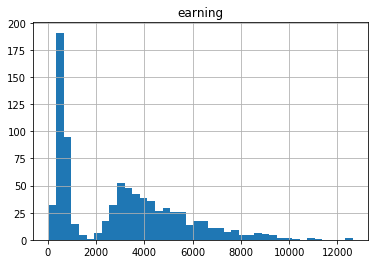

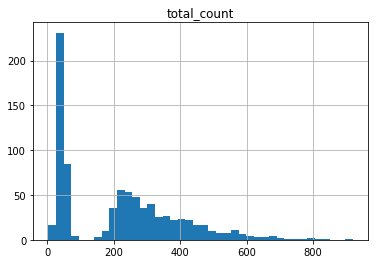

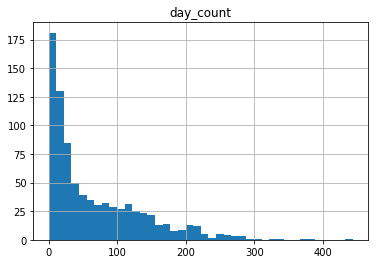

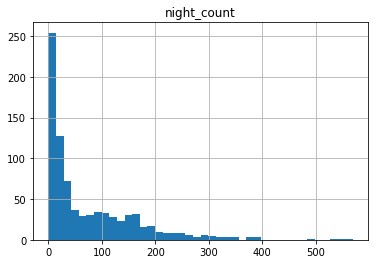

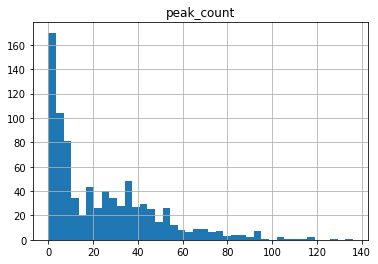

In [273]:
#g = sns.FacetGrid(clustering_data)
#g.map(plt.hist, 'total_count', bins=20)
clustering_data.hist(column= 'earning', bins=40)
clustering_data.hist(column= 'total_count', bins=40)
clustering_data.hist(column= 'day_count', bins=40)
clustering_data.hist(column= 'night_count', bins=40)
clustering_data.hist(column= 'peak_count', bins=40)

In [254]:
X = clustering_data.iloc[:, 1:]
y = clustering_data.iloc[:, 0]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)
# before kmeans, it need normalization and standardlization
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.scale(X)
#print(X_scaled)
#print(scaler.scale_)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [288]:
kmeans.cluster_centers_.round(3)

array([[-0.728, -0.91 , -1.002, -0.754, -0.689, -0.82 ],
       [ 0.548,  0.877,  1.109,  1.771, -0.215,  1.562],
       [ 0.593,  1.973,  1.793,  0.329,  2.255,  0.961],
       [ 0.447,  0.212,  0.263,  0.066,  0.328,  0.078]])

In [287]:
X.columns

Index(['duration', 'sum_prime', 'total_count', 'day_count', 'night_count',
       'peak_count'],
      dtype='object')

In [256]:
kmeans.labels_

array([3, 0, 0, 3, 1, 3, 0, 3, 1, 0, 0, 3, 0, 2, 3, 1, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 1, 3, 0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 3, 0, 3, 3, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 3,
       3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 1, 0, 3, 3, 2, 3, 3, 3,
       2, 0, 0, 2, 0, 0, 3, 3, 3, 1, 3, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 3,
       1, 3, 3, 3, 2, 3, 3, 3, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 3, 0, 1, 3, 0, 3, 0, 0, 3, 0, 3, 1, 1, 3, 2, 0, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 3, 0, 1, 0, 0,
       0, 3, 0, 3, 1, 3, 0, 0, 2, 3, 0, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 0,
       0, 3, 3, 0, 1, 2, 3, 1, 3, 0, 0, 1, 3, 1, 3, 1, 3, 1, 1, 0, 3, 3,
       2, 0, 3, 0, 0, 3, 3, 2, 3, 3, 1, 3, 0, 3, 0, 3, 1, 0, 1, 0, 3, 0,
       3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0,
       0, 0, 1, 1, 2, 0, 3, 3, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 0, 0, 2,
       3, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 0,

In [264]:
from sklearn.cluster import KMeans
kmeans_two_clusters = KMeans(n_clusters=2, random_state=0).fit(X_scaled)

In [269]:
clustering_data['label_4'] = pd.DataFrame(kmeans.labels_)
clustering_data['label_2'] = pd.DataFrame(kmeans_two_clusters.labels_)

clustering_data.drop(['label_4', 'label_2'], inplace=True, axis=1)

In [276]:
clustering_data.groupby(['label_4'])['earning'].mean()
#clustering_data.groupby(['label_2'])['earning'].mean()

label_4
0     595.894887
1    5774.290640
2    7478.785774
3    3673.442205
Name: earning, dtype: float64

In [293]:
# assumption:
ride_timestamps['event'].value_counts()

requested_at      194081
dropped_off_at    194081
picked_up_at      194081
accepted_at       194081
arrived_at        194081
Name: event, dtype: int64

In [339]:
table1 = table

time['driver_onboard_date'] = pd.to_datetime(time['driver_onboard_date'])
time['time'] = pd.to_datetime(time['time'])
q6 = """ select table1.*, driver.driver_onboard_date from table1 join driver on table1.driver_id = driver.driver_id """
time_class = pysqldf(q6)
time_class["plus_10_days"] = time["driver_onboard_date"] + timedelta(days=10)
time_class["plus_30_days"] = time["driver_onboard_date"] + timedelta(days=30)
time_class["plus_60_days"] = time["driver_onboard_date"] + timedelta(days=60)
time_class["plus_90_days"] = time["driver_onboard_date"] + timedelta(days=90)

time_class.head()

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3  002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4  002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   

   ride_distance  ride_duration  ride_prime_time      price  \
0           1811            327               50   9.364653   
1           3362            809                0   9.118747   
2           3282            572                0   8.192580   
3          65283           3338               25  78.298964   
4           4115            823              100  19.416316   

                         time  hour  career_work  night  peak  \
0  2016-04-23 02:13:50.000000     2            0      1     0   
1  2016-03-29 19:00:49.000000    19            0      0     0   
2  2016-06-21 11:56:31.000000    11            1      0     0   
3  2016-05-19 09:15:29.000000     9            0      0     1   
4  2016-04-20 22:05:30.000000    22            0      1     0   

          driver_onboard_date plus_10_days plus_30_days plus_60_days  \
0  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
1  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
2  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
3  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
4  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   

  plus_90_days  
0   2016-06-27  
1   2016-06-27  
2   2016-06-27  
3   2016-06-27  
4   2016-06-27

In [340]:
q7 = """select driver_id, count(ride_id) as count_10_days from time_class
where time > driver_onboard_date and time < plus_10_days group by driver_id"""
count_10 = pysqldf(q7)
print(count_10.head())

q8 = """select driver_id, count(ride_id) as count_30_days from time_class
where time > driver_onboard_date and time < plus_30_days group by driver_id"""
count_30 = pysqldf(q8)
print(count_30.head())

q9 = """select driver_id, count(ride_id) as count_60_days from time_class
where time > driver_onboard_date and time < plus_60_days group by driver_id"""
count_60 = pysqldf(q9)
print(count_60.head())

q10 = """select driver_id, count(ride_id) as count_90_days from time_class
where time > driver_onboard_date and time < plus_90_days group by driver_id"""
count_90 = pysqldf(q10)
print(count_90.head())

time_class['count_10_days'] = count_10['count_10_days']
time_class['count_30_days'] = count_30['count_30_days']
time_class['count_60_days'] = count_60['count_60_days']
time_class['count_90_days'] = count_90['count_90_days']

print(time_class.head())

                          driver_id  count_10_days
0  002be0ffdc997bd5c50703158b7c2491             35
1  007f0389f9c7b03ef97098422f902e62              1
2  011e5c5dfc5c2c92501b8b24d47509bc              7
3  0152a2f305e71d26cc964f8d4411add9             25
4  01674381af7edd264113d4e6ed55ecda             55
                          driver_id  count_30_days
0  002be0ffdc997bd5c50703158b7c2491            112
1  007f0389f9c7b03ef97098422f902e62             11
2  011e5c5dfc5c2c92501b8b24d47509bc             12
3  0152a2f305e71d26cc964f8d4411add9             56
4  01674381af7edd264113d4e6ed55ecda            188
                          driver_id  count_60_days
0  002be0ffdc997bd5c50703158b7c2491            161
1  007f0389f9c7b03ef97098422f902e62             22
2  011e5c5dfc5c2c92501b8b24d47509bc             29
3  0152a2f305e71d26cc964f8d4411add9            155
4  01674381af7edd264113d4e6ed55ecda            375
                          driver_id  count_90_days
0  002be0ffdc997bd5c50703158b7c

In [341]:
time_class.head()

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3  002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4  002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   

   ride_distance  ride_duration  ride_prime_time      price  \
0           1811            327               50   9.364653   
1           3362            809                0   9.118747   
2           3282            572                0   8.192580   
3          65283           3338               25  78.298964   
4           4115            823              100  19.416316   

                         time  hour  career_work  night  peak  \
0  2016-04-23 02:13:50.000000     2            0      1     0   
1  2016-03-29 19:00:49.000000    19            0      0     0   
2  2016-06-21 11:56:31.000000    11            1      0     0   
3  2016-05-19 09:15:29.000000     9            0      0     1   
4  2016-04-20 22:05:30.000000    22            0      1     0   

          driver_onboard_date plus_10_days plus_30_days plus_60_days  \
0  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
1  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
2  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
3  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   
4  2016-03-29 00:00:00.000000   2016-04-08   2016-04-28   2016-05-28   

  plus_90_days  count_10_days  count_30_days  count_60_days  count_90_days  
0   2016-06-27           35.0          112.0          161.0          277.0  
1   2016-06-27            1.0           11.0           22.0           31.0  
2   2016-06-27            7.0           12.0           29.0           34.0  
3   2016-06-27           25.0           56.0          155.0          191.0  
4   2016-06-27           55.0          188.0          375.0          375.0

In [342]:
clustering_data['day_over_total'] = clustering_data['day_count'] / clustering_data['total_count']
clustering_data['night_over_total'] = clustering_data['night_count'] / clustering_data['total_count']
clustering_data['peak_over_total'] = clustering_data['peak_count'] / clustering_data['total_count']
time_class['diff_30_to_10'] = time_class['count_30_days'] - time_class['count_10_days']
time_class['diff_60_to_30'] = time_class['count_60_days'] - time_class['count_30_days']
time_class['diff_90_to_60'] = time_class['count_90_days'] - time_class['count_60_days']

In [345]:
clustering_data['count_10_days'] = time_class['count_10_days']
clustering_data['count_30_days'] = time_class['count_30_days']
clustering_data['count_60_days'] = time_class['count_60_days']
clustering_data['count_90_days'] = time_class['count_90_days']
clustering_data['diff_30_to_10'] = time_class['diff_30_to_10']
clustering_data['diff_60_to_30'] = time_class['diff_60_to_30']
clustering_data['diff_90_to_60'] = time_class['diff_90_to_60']

earning  duration  sum_prime  total_count  day_count  night_count  \
0  3654.988571        86       5375          277       59.0        132.0   
1   332.432448        85        625           31        9.0         17.0   
2   494.240890        68        675           34        8.0         11.0   
3  2646.746561        64       2050          191       32.0        105.0   
4  5463.347539        56       4700          375      191.0          0.0   

   peak_count  label_4  label_2  day_over_total  night_over_total  \
0        19.0        3        0        0.212996          0.476534   
1         3.0        0        1        0.290323          0.548387   
2         2.0        0        1        0.235294          0.323529   
3         8.0        3        1        0.167539          0.549738   
4        53.0        1        0        0.509333          0.000000   

   peak_over_total  count_10_days  count_30_days  count_60_days  \
0         0.068592           35.0          112.0          161.0   
1         0.096774            1.0           11.0           22.0   
2         0.058824            7.0           12.0           29.0   
3         0.041885           25.0           56.0          155.0   
4         0.141333           55.0          188.0          375.0   

   count_90_days  diff_30_to_10  diff_60_to_30  diff_90_to_60  
0          277.0           77.0           49.0          116.0  
1           31.0           10.0           11.0            9.0  
2           34.0            5.0           17.0            5.0  
3          191.0           31.0           99.0           36.0  
4          375.0          133.0          187.0            0.0

In [346]:
clustering_data.drop(['label_4', 'label_2'], inplace=True, axis=1)
clustering_data.head()

earning  duration  sum_prime  total_count  day_count  night_count  \
0  3654.988571        86       5375          277       59.0        132.0   
1   332.432448        85        625           31        9.0         17.0   
2   494.240890        68        675           34        8.0         11.0   
3  2646.746561        64       2050          191       32.0        105.0   
4  5463.347539        56       4700          375      191.0          0.0   

   peak_count  day_over_total  night_over_total  peak_over_total  \
0        19.0        0.212996          0.476534         0.068592   
1         3.0        0.290323          0.548387         0.096774   
2         2.0        0.235294          0.323529         0.058824   
3         8.0        0.167539          0.549738         0.041885   
4        53.0        0.509333          0.000000         0.141333   

   count_10_days  count_30_days  count_60_days  count_90_days  diff_30_to_10  \
0           35.0          112.0          161.0          277.0           77.0   
1            1.0           11.0           22.0           31.0           10.0   
2            7.0           12.0           29.0           34.0            5.0   
3           25.0           56.0          155.0          191.0           31.0   
4           55.0          188.0          375.0          375.0          133.0   

   diff_60_to_30  diff_90_to_60  
0           49.0          116.0  
1           11.0            9.0  
2           17.0            5.0  
3           99.0           36.0  
4          187.0            0.0

In [353]:
X = clustering_data.iloc[:, 1:]
y = clustering_data.iloc[:, 0]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)
# before kmeans, it need normalization and standardlization
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.scale(X)
#print(X_scaled)
#print(scaler.scale_)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
print(kmeans.cluster_centers_.round(2))
print(X.columns)

[[ 0.39  1.75  1.76  1.27  1.15  1.62 -0.09 -0.07  0.15  0.61  1.76  1.85
   1.76  1.67  1.64  0.55]
 [-0.72 -0.91 -1.   -0.75 -0.68 -0.82  0.1  -0.01  0.   -0.31 -0.85 -0.96
  -1.   -0.8  -0.92 -0.56]
 [ 0.64  0.24  0.41  0.94 -0.38  0.7   0.68 -0.8   0.5   0.06  0.17  0.28
   0.41  0.17  0.35  0.56]
 [ 0.4   0.39  0.38 -0.28  0.91 -0.12 -0.75  0.79 -0.54  0.16  0.35  0.39
   0.38  0.32  0.37  0.14]]
Index(['duration', 'sum_prime', 'total_count', 'day_count', 'night_count',
       'peak_count', 'day_over_total', 'night_over_total', 'peak_over_total',
       'count_10_days', 'count_30_days', 'count_60_days', 'count_90_days',
       'diff_30_to_10', 'diff_60_to_30', 'diff_90_to_60'],
      dtype='object')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [350]:
clustering_data.isna().sum()
clustering_data.dropna(inplace=True)

In [356]:
a=pd.DataFrame(kmeans.cluster_centers_.round(2))
a.columns= ['duration', 'sum_prime', 'total_count', 'day_count', 'night_count',
       'peak_count', 'day_over_total', 'night_over_total', 'peak_over_total',
       'count_10_days', 'count_30_days', 'count_60_days', 'count_90_days',
       'diff_30_to_10', 'diff_60_to_30', 'diff_90_to_60']
a

duration  sum_prime  total_count  day_count  night_count  peak_count  \
0      0.39       1.75         1.76       1.27         1.15        1.62   
1     -0.72      -0.91        -1.00      -0.75        -0.68       -0.82   
2      0.64       0.24         0.41       0.94        -0.38        0.70   
3      0.40       0.39         0.38      -0.28         0.91       -0.12   

   day_over_total  night_over_total  peak_over_total  count_10_days  \
0           -0.09             -0.07             0.15           0.61   
1            0.10             -0.01             0.00          -0.31   
2            0.68             -0.80             0.50           0.06   
3           -0.75              0.79            -0.54           0.16   

   count_30_days  count_60_days  count_90_days  diff_30_to_10  diff_60_to_30  \
0           1.76           1.85           1.76           1.67           1.64   
1          -0.85          -0.96          -1.00          -0.80          -0.92   
2           0.17           0.28           0.41           0.17           0.35   
3           0.35           0.39           0.38           0.32           0.37   

   diff_90_to_60  
0           0.55  
1          -0.56  
2           0.56  
3           0.14

In [366]:
# apply PCA to two dimensions, then Kmeans to draw the points on. PCA two axis to see if the are totally seperated
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled) 
y=pca.transform(X_scaled)
print(pca.explained_variance_ratio_)  


[0.5310688 0.1815019]


In [362]:
"""A weakness, which is common to clustering in general, 
concerns the visualization of the obtained clusters. 
A possible solution is to preprocess the data using PCA (1). 
First, the PCA procedure is applied to the data. """
pca.singular_values_ 

array([84.13135534, 49.18391376])

In [370]:
pca_data = pd.DataFrame(y)
pca_data.head()
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=4, random_state=0).fit(pca_data)
print(kmeans_pca.cluster_centers_.round(2))

[[ 1.03  1.69]
 [-2.92 -0.06]
 [ 1.14 -1.34]
 [ 5.18 -0.18]]


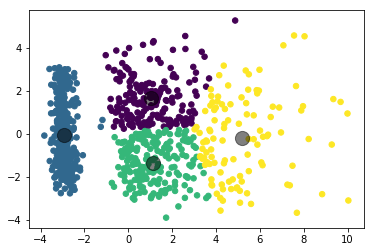

In [379]:
plt.scatter(pca_data.iloc[:, 0],pca_data.iloc[:, 1],
                     c=kmeans_pca.labels_,s=30)
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

[[ 1.03  1.69]
 [-2.92 -0.06]
 [ 1.14 -1.34]
 [ 5.18 -0.18]]


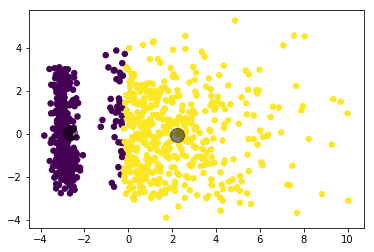

In [381]:
kmeans_pca_2 = KMeans(n_clusters=2, random_state=0).fit(pca_data)
print(kmeans_pca.cluster_centers_.round(2))
plt.scatter(pca_data.iloc[:, 0],pca_data.iloc[:, 1],
                     c=kmeans_pca_2.labels_,s=30)
centers = kmeans_pca_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [386]:
# spectual clustering:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(pca_data)
print(clustering.labels_)

[1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 

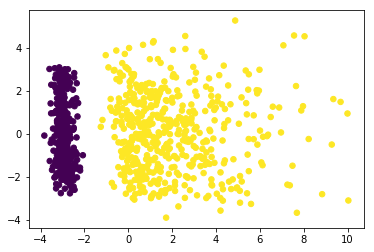

In [387]:
plt.scatter(pca_data.iloc[:, 0],pca_data.iloc[:, 1],
                     c=clustering.labels_,s=30)

In [409]:
# count the number of ride per day (group by month and day)
table1['date'] = table1['time'].dt.date
q11="""select driver_id, date,  count(*) as count_daily from table1 group by driver_id, date order by driver_id, date"""
count_daily = pysqldf(q11)
count_daily

driver_id        date  count_daily
0      002be0ffdc997bd5c50703158b7c2491  2016-03-29            6
1      002be0ffdc997bd5c50703158b7c2491  2016-03-31            8
2      002be0ffdc997bd5c50703158b7c2491  2016-04-01            7
3      002be0ffdc997bd5c50703158b7c2491  2016-04-02            5
4      002be0ffdc997bd5c50703158b7c2491  2016-04-05            7
5      002be0ffdc997bd5c50703158b7c2491  2016-04-07            2
6      002be0ffdc997bd5c50703158b7c2491  2016-04-09            1
7      002be0ffdc997bd5c50703158b7c2491  2016-04-10            1
8      002be0ffdc997bd5c50703158b7c2491  2016-04-11            2
9      002be0ffdc997bd5c50703158b7c2491  2016-04-12           11
10     002be0ffdc997bd5c50703158b7c2491  2016-04-13            7
11     002be0ffdc997bd5c50703158b7c2491  2016-04-14            3
12     002be0ffdc997bd5c50703158b7c2491  2016-04-15            5
13     002be0ffdc997bd5c50703158b7c2491  2016-04-16           11
14     002be0ffdc997bd5c50703158b7c2491  2016-04-17            4
15     002be0ffdc997bd5c50703158b7c2491  2016-04-19           10
16     002be0ffdc997bd5c50703158b7c2491  2016-04-20            7
17     002be0ffdc997bd5c50703158b7c2491  2016-04-21            4
18     002be0ffdc997bd5c50703158b7c2491  2016-04-22            1
19     002be0ffdc997bd5c50703158b7c2491  2016-04-23            6
20     002be0ffdc997bd5c50703158b7c2491  2016-04-24            1
21     002be0ffdc997bd5c50703158b7c2491  2016-04-26            2
22     002be0ffdc997bd5c50703158b7c2491  2016-04-27            1
23     002be0ffdc997bd5c50703158b7c2491  2016-05-05            7
24     002be0ffdc997bd5c50703158b7c2491  2016-05-06            3
25     002be0ffdc997bd5c50703158b7c2491  2016-05-15            3
26     002be0ffdc997bd5c50703158b7c2491  2016-05-17            7
27     002be0ffdc997bd5c50703158b7c2491  2016-05-18            2
28     002be0ffdc997bd5c50703158b7c2491  2016-05-19            7
29     002be0ffdc997bd5c50703158b7c2491  2016-05-20            6
...                                 ...         ...          ...
26182  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-13            3
26183  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-14           25
26184  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-15           23
26185  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-16           17
26186  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-17            5
26187  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-28            2
26188  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-29           17
26189  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-30            4
26190  ffff51a71f2f185ec5e97d59dbcd7a78  2016-05-31           15
26191  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-01            8
26192  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-02            4
26193  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-03            7
26194  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-04            9
26195  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-05            8
26196  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-06           20
26197  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-10            8
26198  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-11           21
26199  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-12           18
26200  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-13           12
26201  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-15           10
26202  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-16            6
26203  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-18            5
26204  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-19            2
26205  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-20            5
26206  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-21            4
26207  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-22            4
26208  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-23            1
26209  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-24           16
26210  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-25            7
26211  ffff51a71f2f185ec5e97d59dbcd7a78  2016-06-26            2


In [413]:
# use DTW
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# example:
x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [417]:
count_timeseries=pd.pivot_table(count_daily, values = ['count_daily'], index = ['driver_id'], columns= ['date'])
count_timeseries.fillna(value = 0, inplace=True)
count_timeseries_array=count_timeseries.values

import scipy.spatial.distance as sd
def my_fastdtw(sales1, sales2):
    return fastdtw(sales1,sales2)[0]

distance_matrix = sd.pdist(count_timeseries_array, my_fastdtw)


count_daily                                   \
date                              2016-03-28 2016-03-29 2016-03-30 2016-03-31   
driver_id                                                                       
002be0ffdc997bd5c50703158b7c2491         0.0        6.0        0.0        8.0   
007f0389f9c7b03ef97098422f902e62         0.0        1.0        0.0        0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0        0.0        0.0        0.0   
0152a2f305e71d26cc964f8d4411add9         0.0        0.0        0.0        0.0   
01674381af7edd264113d4e6ed55ecda         0.0        0.0        0.0        0.0   
0213f8b59219e32142711992ca4ec01f         0.0        0.0        0.0        0.0   
021e5cd15ef0bb3ec20a12af99e142b3         0.0        0.0        0.0        0.0   
0258e250ca195cc6258cbdc75aecd853         0.0        0.0        0.0        0.0   
028b5a4dcd7f4924ebfabcf2e814c014         0.0        0.0        0.0        0.0   
02d6a6b8a6da15fc219a9570f7ebbe78         0.0        0.0        0.0        0.0   
02e440f6c209206375833cef02e0cbae         0.0        0.0        0.0        2.0   
036f3d94e7c65e4e3574822d31c72656         0.0        0.0        0.0        0.0   
039c5afbca8e03e4c18d9c8ea94140ac         0.0        0.0        0.0        0.0   
039da9c077e17af98ca8530e4d7975f1         0.0        0.0        0.0        0.0   
03f2b5c74cb89f39e58711699e76bf39         0.0        0.0        0.0        0.0   
03f5278eb43475aa6790f5be32463755         0.0        0.0        0.0        0.0   
0430df9a3eb327122c57ee3a64765000         0.0        0.0        0.0        0.0   
04c4ffa5a385eab86fa7e422263d2999         0.0        0.0        0.0        0.0   
04d686ef2fba281e395992a28f14fdd3         0.0        0.0        0.0        0.0   
052bba06c5fc0bdea4bc2f9cb92b37c7         0.0        0.0        0.0        0.0   
059ed570673c2d15ca11dd6b3a25513b         0.0        0.0        0.0        0.0   
05addf442c147875efa5cf53453ad47b         0.0        0.0        0.0        0.0   
05bad02e08c7f849e91dc1259da8b4ec         0.0        0.0        0.0        0.0   
0656192a402808805282e60761bda088         0.0        0.0        0.0        0.0   
06b1ba06e5505f8218ec8686498f990a         0.0        0.0        0.0        0.0   
06c848ab3a7fc5421e82e98850a81710         0.0        0.0        0.0        0.0   
07dd442e3e0b9f0f9b0d69c7b47cbb06         0.0        0.0        0.0        0.0   
07e6a2fdaadc640cca9a7bec41351065         0.0        0.0        0.0        0.0   
081d8ba3bc9a00a481df02bd9d0a4c53         0.0        0.0        0.0        0.0   
0822973f3e812a68a867962dbbd37f5d         0.0        0.0        0.0        0.0   
...                                      ...        ...        ...        ...   
f696de645de36b56677457d2d3136524         0.0        0.0        0.0        0.0   
f758703e18f588f2370783f8b779e664         0.0        5.0        3.0        0.0   
f7858e1e354a9fa26b3055bc12a4ee5b         0.0        0.0        0.0        0.0   
f86eb77e1cefe28e9f0e9d3775fae261         5.0        7.0        7.0       10.0   
f91254f1c1b3112ef3464e477d23c9e8         0.0        0.0        0.0        0.0   
f98673773627b4b8d152e2b168b85bb2         0.0        0.0        0.0        0.0   
f9aa6d69d74e786544027a1ab3049f44         0.0        0.0        0.0        0.0   
fac81ea6cbd540c89c7eee17e851a233         0.0        0.0        0.0        0.0   
faebff3d5429ff2036c125a91df765c8         2.0        2.0        2.0        0.0   
fb83fc6555a4f700fd92630d9fcb9cea         0.0        0.0        0.0        0.0   
fb903879c556260ae2604ae0c45cb92a         0.0        0.0        0.0        0.0   
fba8372d56b91b1bff7b71d970b5af58         0.0        0.0        0.0        0.0   
fbe0433e5b1a3db9dc9d6ed21efc6148         0.0        0.0        0.0        0.0   
fc3504d2efaaaa976a33b3c856927155         0.0        0.0        0.0        0.0   
fc83b793850ea70d9e898afd0b3ef592         0.0        0.0        0.0        0.0   
fd2130d0d215069168dc2f79c1f5ae44         0.0        0.0        0

In [434]:
#from fastdtw import fastdtw
import scipy.spatial.distance as sd

distance_matrix = []
m = len(count_timeseries_array)    
for i in range(0, m - 1):
    for j in range(i + 1, m):
        distance_matrix.append(fastdtw(count_timeseries_array[i], count_timeseries_array[j]))

In [431]:
import scipy.spatial.distance as sd
def my_fastdtw(sales1, sales2):
    return fastdtw(sales1,sales2)[0]

distance_matrix = sd.pdist(count_timeseries_array, my_fastdtw)



In [441]:
distance_matrix

[(234.0,
  [(0, 0),
   (1, 1),
   (2, 1),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 2),
   (6, 3),
   (6, 4),
   (6, 5),
   (7, 5),
   (8, 5),
   (9, 5),
   (10, 6),
   (11, 6),
   (11, 7),
   (11, 8),
   (11, 9),
   (11, 10),
   (11, 11),
   (11, 12),
   (11, 13),
   (11, 14),
   (11, 15),
   (11, 16),
   (11, 17),
   (11, 18),
   (11, 19),
   (11, 20),
   (11, 21),
   (12, 22),
   (13, 23),
   (14, 24),
   (15, 25),
   (16, 25),
   (17, 25),
   (18, 25),
   (19, 25),
   (20, 26),
   (21, 26),
   (22, 27),
   (23, 27),
   (24, 27),
   (25, 28),
   (25, 29),
   (26, 30),
   (27, 31),
   (27, 32),
   (28, 33),
   (28, 34),
   (28, 35),
   (28, 36),
   (28, 37),
   (28, 38),
   (29, 39),
   (30, 40),
   (31, 40),
   (31, 41),
   (31, 42),
   (31, 43),
   (32, 43),
   (32, 44),
   (32, 45),
   (33, 45),
   (34, 45),
   (34, 46),
   (34, 47),
   (35, 47),
   (36, 47),
   (36, 48),
   (36, 49),
   (37, 49),
   (38, 50),
   (39, 51),
   (40, 52),
   (40, 53),
   (41, 53),
   (42, 53),
   (42, 

In [442]:
dis = [item[0] for item in distance_matrix]
dis


[234.0,
 198.0,
 210.0,
 389.0,
 321.0,
 229.0,
 258.0,
 360.0,
 232.0,
 225.0,
 190.0,
 221.0,
 379.0,
 233.0,
 349.0,
 262.0,
 269.0,
 309.0,
 236.0,
 220.0,
 278.0,
 231.0,
 279.0,
 282.0,
 295.0,
 256.0,
 247.0,
 237.0,
 249.0,
 456.0,
 454.0,
 233.0,
 252.0,
 407.0,
 255.0,
 292.0,
 268.0,
 231.0,
 217.0,
 208.0,
 340.0,
 231.0,
 207.0,
 344.0,
 393.0,
 358.0,
 255.0,
 260.0,
 268.0,
 240.0,
 321.0,
 501.0,
 247.0,
 260.0,
 240.0,
 427.0,
 230.0,
 307.0,
 247.0,
 250.0,
 232.0,
 273.0,
 252.0,
 251.0,
 379.0,
 354.0,
 249.0,
 469.0,
 267.0,
 238.0,
 274.0,
 269.0,
 330.0,
 264.0,
 249.0,
 268.0,
 248.0,
 243.0,
 442.0,
 214.0,
 352.0,
 260.0,
 200.0,
 227.0,
 218.0,
 492.0,
 263.0,
 258.0,
 304.0,
 501.0,
 241.0,
 246.0,
 399.0,
 249.0,
 221.0,
 314.0,
 283.0,
 222.0,
 494.0,
 227.0,
 233.0,
 211.0,
 242.0,
 246.0,
 263.0,
 304.0,
 469.0,
 346.0,
 242.0,
 218.0,
 230.0,
 246.0,
 197.0,
 219.0,
 256.0,
 405.0,
 209.0,
 313.0,
 213.0,
 225.0,
 324.0,
 463.0,
 221.0,
 504.0,
 495.0,


In [443]:
len(dis)

355746

In [446]:
arr = np.zeros([844, 844])
index = 0
for i in range(0, m-1):
    for j in range(i+2, m):
        arr[i][j] = arr[j][i] = dis[index]
        index += 1

In [462]:
arr = np.zeros([844, 844])
index = 0
for i in range(0, m-1):
    for j in range(i+1, m):
        arr[i][j] = arr[j][i] = dis[index]
        index += 1

In [468]:
df = pd.DataFrame(arr)

In [469]:
df.shape

(844, 844)

In [470]:
df.head()

0      1      2      3      4      5      6      7      8      9    \
0    0.0  234.0  198.0  210.0  389.0  321.0  229.0  258.0  360.0  232.0   
1  234.0    0.0   40.0  216.0  404.0  230.0   84.0  318.0  537.0   89.0   
2  198.0   40.0    0.0  237.0  390.0  222.0   87.0  321.0  562.0   74.0   
3  210.0  216.0  237.0    0.0  566.0  431.0  244.0  401.0  543.0  253.0   
4  389.0  404.0  390.0  566.0    0.0  615.0  428.0  489.0  667.0  437.0   

   ...      834    835    836    837    838    839    840    841    842    843  
0  ...    244.0  475.0  329.0  265.0  254.0  244.0  289.0  237.0  357.0  350.0  
1  ...     63.0  417.0  369.0  278.0   60.0  266.0  406.0   63.0  527.0  405.0  
2  ...     66.0  405.0  383.0  296.0   54.0  270.0  376.0   61.0  522.0  392.0  
3  ...    223.0  357.0  444.0  422.0  211.0  373.0  407.0  226.0  564.0  471.0  
4  ...    407.0  318.0  443.0  530.0  403.0  431.0  473.0  410.0  711.0  562.0  

[5 rows x 844 columns]

In [496]:
# DBSCAN 
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=100, metric="precomputed").fit(arr)

In [497]:
print (db.labels_) 

[-1  0  0 -1 -1 -1  0 -1 -1  0  0 -1  0 -1 -1 -1  0  0 -1  0  0 -1  0 -1
  0 -1 -1  0 -1  0 -1 -1  0  0 -1  0 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1  0
  0  0  0 -1 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0 -1 -1  0 -1  0  0  0
  0 -1  0  0  0 -1  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1  0  0
 -1 -1 -1 -1 -1  0  0 -1  0  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1  0 -1 -1 -1  0 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1
  0  0 -1  0 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0  0  0  0
 -1 -1  0  0  0 -1 -1  0 -1  0  0  0 -1  0 -1 -1 -1  0  0 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1
  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0  0 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1  0  0
 -1 -1  0 -1 -1  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1  0 -1 -1 -1  0  0 -1 -1  0 -1 -1  0 -1 -1 -1 -1